In [5]:
import numpy as np
import matplotlib.pyplot as plt

The aim is to solve the following variational problem
$$\min_u \frac{1}{2} \|Ku - f^{\delta}\|_2^2 + \alpha \|Lu\|_1,$$
where $K$ is a given forward operator (matrix) and $L$ is a discretisation of the second derivative operator.

1. Describe and implement a splitting method; you can be creative here -- multiple answers are possible
2. Compare your method with the basic subgradient-descent method implemented below
3. (bonus) Find a suitable value for $\alpha$ using the discrepancy principle

In [104]:
def getK(n):
    h = 1/n;
    x = np.linspace(h/2,1-h/2,n)
    xx,yy = np.meshgrid(x,x)
    K = h/(1 + (xx - yy)**2)**(3/2)
    
    return K,x

In [105]:
def getL(n):
    h = 1/n;
    L = (np.diag(np.ones(n-1),-1) - 2*np.diag(np.ones(n),0) + np.diag(np.ones(n-1),1))/h**2
    return L

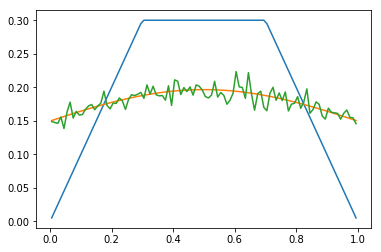

In [106]:
# define grid and operators
n = 100
delta = 1e-2
K,x = getK(n)
L = getL(n)

# true solution and corresponding data
u = np.minimum(0.5 - np.abs(0.5-x),0.3 + 0*x)
f = K@u

# noisy data
noise = np.random.randn(n)
f_delta = f + delta*noise

# plot
plt.plot(x,u,x,f,x,f_delta)

In [159]:
alpha = 1e-6
niter = 50000
t = 1e-3
ur = np.zeros(n)
objective = np.zeros(niter)
for k in range(niter):
    # keep track of function value
    objective[k] = 0.5*np.linalg.norm(K@ur - f_delta,2)**2 + alpha*np.linalg.norm(L@ur,1)
    # compute (sub) gradient
    gr = (K.T@(K@ur - f_delta) + alpha*L.T@np.sign(L@ur))
    # update with stepsize t/norm(gr)
    ur = ur - t*gr/np.linalg.norm(gr,2)

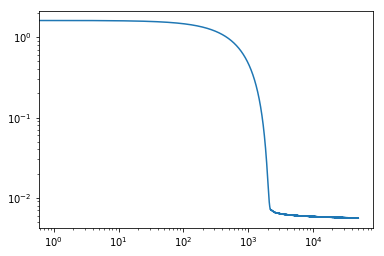

In [160]:
# plot convergence history
plt.loglog(objective)

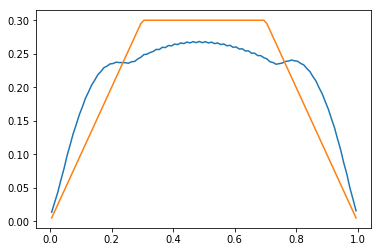

In [158]:
# plot solution
plt.plot(x,ur,x,u)